<a href="https://colab.research.google.com/github/deepryu/DL/blob/master/GAN_MNIST_%EB%8F%99%EC%9E%913_ConditionalGAN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
cd /content/drive/MyDrive/E_Colab Notebooks/00. 2. 강의_실습예제_책예제/1. GAN_예제_MNIST

/content/drive/MyDrive/E_Colab Notebooks/00. 2. 강의_실습예제_책예제/1. GAN_예제_MNIST


In [ ]:
pwd

'/content/drive/MyDrive/E_Colab Notebooks/00. 2. 강의_실습예제_책예제/1. GAN_예제_MNIST'

In [ ]:
import os
import numpy as np
from tensorflow import keras
import tensorflow as tf
import matplotlib.pyplot as plt

# 1. data read

(train_X, _), (_, _) = keras.datasets.mnist.load_data()

print('train_X shape: ', train_X.shape)

train_X shape:  (60000, 28, 28)


In [ ]:
train_X[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,  30,  36,  94, 154, 170,
        253, 253, 253, 253, 253, 225, 172, 253, 242, 195,  64,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,  49, 238, 253, 253, 253, 253,
        253, 253, 253, 253, 251,  93,  82,  82,  56,  39,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,  18, 219, 253, 253, 253, 253,
        253, 198, 182, 247, 241,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,  80, 156, 107, 253, 253,
        205,  11,   0,  43, 154,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,  14,   1, 154, 253,
         90,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0, 139, 253,
        190,   2,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,  11, 190,
        253,  70,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,  35,
        241, 225, 160, 108,   1,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         81, 240, 253, 253, 119,  25,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,  45, 186, 253, 253, 150,  27,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,  16,  93, 252, 253, 187,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0, 249, 253, 249,  64,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,  46, 130, 183, 253, 253, 207,   2,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,  39,
        148, 229, 253, 253, 253, 250, 182,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,  24, 114, 221,
        253, 253, 253, 253, 201,  78,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,  23,  66, 213, 253, 253,
        253, 253, 198,  81,   2,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,  18, 171, 219, 253, 253, 253, 253,
        195,  80,   9,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,  55, 172, 226, 253, 253, 253, 253, 244, 133,
         11,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0, 136, 253, 25

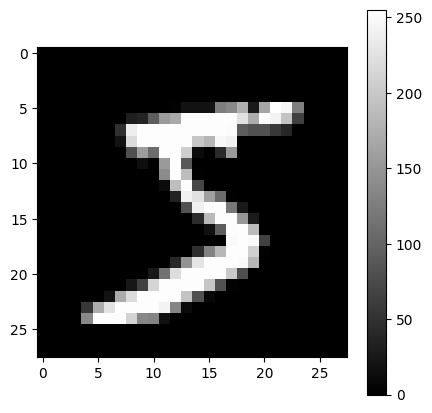

In [ ]:
# 그림의 가로 크기를 5인치, 세로 크기를 5인치
plt.figure(figsize=(5, 5))
plt.imshow(train_X[0], cmap='gray')
# 정규화 후: -1이 가장 어두운 검은색, 1이 가장 밝은 흰색
plt.colorbar()
plt.show()

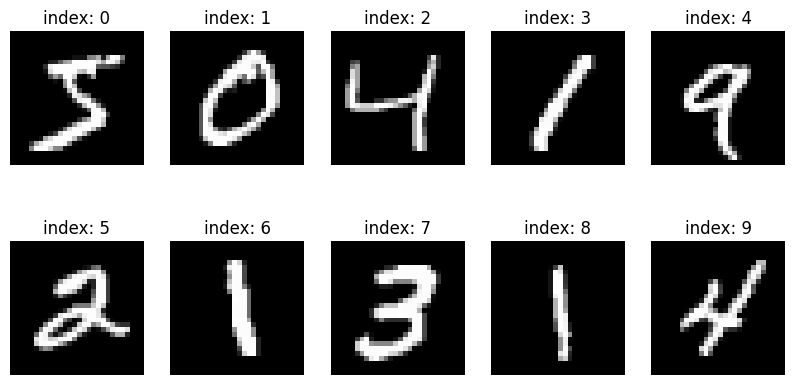

In [ ]:
# for문을 이용해 열 개정도 출력
plt.figure(figsize=(10, 5))
for i in range(10):
    # 여러개의 이미지를 2*5의 배열로 출
    plt.subplot(2, 5, i+1)
    plt.imshow(train_X[i], cmap='gray')
    plt.title(f"index: {i}")
    plt.axis('off')

In [ ]:
# Normalize pixel values between -1 and 1
train_X = train_X / 127.5 - 1.0

# Reshape the images from (num_samples, 28, 28) to (num_samples, 28, 28, 1)
train_X = train_X.reshape(train_X.shape[0], 28, 28, 1).astype('float32')

print('train_X shape: ', train_X.shape)

train_X shape:  (60000, 28, 28, 1)


In [ ]:
# Reshape the first image to (28, 28) to remove the single color channel
train_X[0].reshape(28, 28)

array([[-1.        , -1.        , -1.        , -1.        , -1.        ,
        -1.        , -1.        , -1.        , -1.        , -1.        ,
        -1.        , -1.        , -1.        , -1.        , -1.        ,
        -1.        , -1.        , -1.        , -1.        , -1.        ,
        -1.        , -1.        , -1.        , -1.        , -1.        ,
        -1.        , -1.        , -1.        ],
       [-1.        , -1.        , -1.        , -1.        , -1.        ,
        -1.        , -1.        , -1.        , -1.        , -1.        ,
        -1.        , -1.        , -1.        , -1.        , -1.        ,
        -1.        , -1.        , -1.        , -1.        , -1.        ,
        -1.        , -1.        , -1.        , -1.        , -1.        ,
        -1.        , -1.        , -1.        ],
       [-1.        , -1.        , -1.        , -1.        , -1.        ,
        -1.        , -1.        , -1.        , -1.        , -1.        ,
        -1.        , -1.    

In [ ]:
# "60000" specifies the buffer size for shuffling, which determines
# how many samples TensorFlow will shuffle in memory before batching
train_dataset = tf.data.Dataset.from_tensor_slices(train_X).shuffle(60000).batch(256)

In [ ]:
train_dataset

<_BatchDataset element_spec=TensorSpec(shape=(None, 28, 28, 1), dtype=tf.float32, name=None)>

In [ ]:
# 2. model build

#==================================================================================#
# Generator model:  transform a 100-dimensional input into a 28x28 grayscale image #
#==================================================================================#

def make_generator():
    model= keras.Sequential([
        keras.layers.Input(shape=(100,)),

        # 입력 벡터를 7 × 7 × 32 크기의 레이어 생성
        keras.layers.Dense(7 * 7 * 32, activation='relu'),

        # 평균이 0, 분산이 1이 되도록 정규화하여, 레이어 간의 데이터 분포를 일정하게 유지하고, 학습 안정화
        # 학습 안정화 + 빠른 학습 + 과적합 방지 + 초기화 민감성 감소
        keras.layers.BatchNormalization(),

        # 1차원 텐서를 3차원 형태 (7, 7, 32)로 변환.
        keras.layers.Reshape((7, 7, 32)),

        # 출력 크기: (14, 14, 64). stride=2는 이미지 크기를 두 배로 확장.
        # filters=64: 출력 특성 맵(feature map)의 개수
        # kernel_size=3: 커널(필터)의 크기
        # strides=2는 입력 텐서의 가로와 세로 크기를 두 배로 늘림
        # padding= 'same': 제로 패딩을 추가하여 입력 크기 유지
        keras.layers.Conv2DTranspose(64, 3, strides=2, padding='same', activation='relu'),
        keras.layers.BatchNormalization(),

        # 출력 크기: (28, 28, 32)
        keras.layers.Conv2DTranspose(32, 3, strides=2, padding='same', activation='relu'),
        keras.layers.BatchNormalization(),

        # 출력 크기: (28, 28, 1). 채널이 1인 흑백 이미지를 생성합니다.
        #            출력값을 -1에서 1사이로 고정하기 위해 'tanh'를 사용
        keras.layers.Conv2DTranspose(1, 3, strides=1, padding='same', activation = 'tanh')
        ])
    return model

In [ ]:
def make_discriminator():
    model= keras.Sequential([
        keras.layers.Input(shape=(28, 28, 1)),
        keras.layers.Conv2D(32, 3, strides=2, padding='same', activation='relu'),

        # 학습 중 랜덤하게 선택된 노드(뉴런)들의 출력을 0으로 설정
        # 특정 노드에 과도하게 의존하는 것을 방지하고, 네트워크가 더 일반화된 학습을 하도록 유도
        # 0.3: 학습 과정에서 각 노드가 비활성화될 확률이 30%임을 나타내고, 나머지 70%의 노드는 활성 상태로 학습에 기여
        keras.layers.Dropout(0.3),

        keras.layers.Conv2D(64, 3, strides=2,padding='same', activation='relu'),

        keras.layers.Dropout(0.3),
        keras.layers.Flatten(),
        keras.layers.Dense(1)
    ])
    return model

In [ ]:
generator = make_generator()
discriminator = make_discriminator()

generator.summary()
discriminator.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_2 (Dense)                      │ (None, 1568)                │         158,368 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_3                │ (None, 1568)                │           6,272 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ reshape_1 (Reshape)                  │ (None, 7, 7, 32)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_transpose_3 (Conv2DTranspose) │ (None, 14, 14, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_4                │ (None, 14, 14, 64)          │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_transpose_4 (Conv2DTranspose) │ (None, 28, 28, 32)          │          18,464 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_5                │ (None, 28, 28, 32)          │             128 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_transpose_5 (Conv2DTranspose) │ (None, 28, 28, 1)           │             289 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 202,273 (790.13 KB)

 Trainable params: 198,945 (777.13 KB)

 Non-trainable params: 3,328 (13.00 KB)

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_2 (Conv2D)                    │ (None, 14, 14, 32)          │             320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 14, 14, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_3 (Conv2D)                    │ (None, 7, 7, 64)            │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_3 (Dropout)                  │ (None, 7, 7, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_1 (Flatten)                  │ (None, 3136)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 1)                   │           3,137 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 21,953 (85.75 KB)

 Trainable params: 21,953 (85.75 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
# TODO: Loss는 Binary Cross Entropy (BCE) 로 정의
# BinaryCrossentropy: 이진 분류 문제에서 사용하는 손실 함수로, 모델의 출력값과 실제 값 간의 차이를 계산
# from_logits=True: BinaryCrossEntropy에 입력된 값을 0~1 사이의 값으로 변환
loss = keras.losses.BinaryCrossentropy(from_logits=True)

In [ ]:
# 생성자의 가중치를 업데이트함
optimizer_g = tf.keras.optimizers.Adam(1e-4)

# 판별자의 가중치를 업데이트
optimizer_d = tf.keras.optimizers.Adam(1e-4)

In [ ]:
EPOCHS = 200
latent_dim = 100
batch_size = 256

In [ ]:
def train_step(inputs):
    # Noise generation: 즉, fake data를 만들기위한 random한 z 생성
    random_z = tf.random.normal([batch_size, latent_dim])

    with tf.GradientTape() as tape_g, tf.GradientTape() as tape_d:
        # random_z로부터 생성자가 fake data 생성 => g_z
        #g_z = generator(random_z)
        generated_images = generator(random_z)

        # 판별자가 data의 진위여부 판별 (1이면 real이다!, 0이면 fake이다! 라고 판단한 것)
        real_output = discriminator(inputs) # real data를 입력받아 판별
        fake_output = discriminator(generated_images) # fake data를 입력받아 판별

        # tf.ones_like()는 주어진 tensor와 동일한 차원정보를 가지고 1로 채워진 tensor 생성
        # 즉, 모든 data가 real이라고 판단된 경우를 나타내기 위한 코드이다.
        # tf.zeros_like()는 주어진 tensor와 동일한 차원정보를 가지고 0로 채워진 tensor 생성
        # 즉, 모든 data가 fake라고 판단된 경우를 나타내기 위한 코드이다.

        ######################## 생성자 loss 계산 ##############################
        # fake_output은 fake data에 대한 판별자의 판별 결과
        # 생성된 fake data가 진짜같이 생겼을 경우 fake_output에 1(real로 판단)이 많이 나와야함
        # 즉, fake_output에 1이 많을수록 loss는 낮아짐
        #######################################################################
        loss_g = loss(tf.ones_like(fake_output), fake_output)

        ######################## 판별자 loss 계산 ##############################
        # real_output은 real data에 대한 판별자의 판별 결과
        # real data는 1로 판단하고 fake data는 0으로 판단해야함
        # real data에 대해서는 1로, fake data에 대해서는 0으로 판단할수록 loss는 낮아짐
        #######################################################################
        loss_d = loss(tf.ones_like(real_output), real_output) + loss(tf.zeros_like(fake_output), fake_output)

        # 생성자,판별자에 대해서 역전파 수행
        grads_g = tape_g.gradient(loss_g, generator.trainable_variables)
        grads_d = tape_d.gradient(loss_d, discriminator.trainable_variables)

         # 가중치 업데이트
         # The gradients are applied to update the weights of the generator and discriminator using their respective optimizers
        optimizer_g.apply_gradients(zip(grads_g, generator.trainable_variables))
        optimizer_d.apply_gradients(zip(grads_d, discriminator.trainable_variables))

    return loss_g, loss_d


In [ ]:
import matplotlib.pyplot as plt

# 매번 학습이 어떻게 진행되고 있는지를 확인하기 위해 생성자가 생성한 샘플을 확인
def save_generated_images(epoch, seed):

    # 생성기에 노이즈를 입력하여 10개의 이미지를 생성
    generated_imgs = generator.predict(seed)

    # GAN에서 생성된 이미지는 일반적으로 값이 [-1, 1] 사이로 스케일링되어 있음
    # 이를 [0, 1] 사이로 재조정하여 시각화에 적합하게 만듦
    generated_imgs = 0.5 * generated_imgs + 0.5

    plt.figure(figsize=(10, 1))
    for i in range(generated_imgs.shape[0]):
        plt.subplot(1, 10, i + 1)

        # 생성된 이미지를 2D 형태로 변환하여 표시
        plt.imshow(generated_imgs[i, :, :, 0], interpolation='nearest')
        plt.axis('off')
    plt.tight_layout()
    plt.savefig('results/gan_generated_image_at_epoch_{:04d}.png'.format(epoch))
    plt.show()

In [ ]:
##############################################################################
# 학습 안정화 전략
# 1. Batch Normalization: 생성자와 판별자 모두에서 배치 정규화를 사용해 훈련을 안정화
# 2. Dropout: 판별자에 드롭아웃을 추가하여 과적합을 방지
##############################################################################

# 예시: generator_loss과 discriminator_losses값 저장을 위한 리스트
generator_losses = []
discriminator_losses = []

###### 고정된 노이즈를 이용하여 학습과정에서 진전 과정을 살펴봄
seed = tf.random.normal([10, latent_dim])
###############################################################################

# Training
for epoch in range(1, EPOCHS + 1):
    total_loss_g, total_loss_d = 0, 0

    # 각 배치별로 train_step을 수행해서 loss를 받아옴
    for image_batch in train_dataset:
        loss_g, loss_d = train_step(image_batch)
        total_loss_g += loss_g
        total_loss_d += loss_d

    # 학습성능 출력간격별로 출력
    print(f'Epoch {epoch:3d}: Generator loss {total_loss_g:.2f}, Discriminator loss {total_loss_d:.2f}')
    save_generated_images(epoch, seed)

    # generator_loss과 discriminator_losses를 리스트에 추가
    generator_losses.append(total_loss_g)
    discriminator_losses.append(total_loss_d)

NameError: name 'tf' is not defined

In [ ]:
# 학습이 끝난 후 generator loss 그래프 시각화
plt.plot(generator_losses, label='Generator Loss')
plt.plot(discriminator_losses, label='Discriminator Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Generator and Discriminator Loss during Training')
plt.legend()
plt.show()

In [ ]:
# 랜덤한 한개의 random_z를 생성하여 이미지가 어떻게 생성되는지 확인
random_z = tf.random.normal([1, latent_dim])

# 생성자에 random_z입력하여서 fake data생성
g_z = generator(random_z)

# 생성된 fake data 시각화
plt.imshow(g_z[0, :, :, 0], cmap='gray')
plt.show()

In [ ]:
# Generator로부터 Image Sampling
def plot_latent_images(n, digit_size=28):
    noises = tf.random.normal([n, n, latent_dim])
    image_width = digit_size * n
    image_height = image_width
    image = np.zeros((image_height, image_width))

    for i in range(n):
        for j in range(n):
            z = tf.random.normal([1, latent_dim])
            g_z = generator(z)
            image[i * digit_size : (i+1)*digit_size, j * digit_size : (j+1) * digit_size] = g_z[0, :, :, 0]

    plt.figure(figsize=(10,10))
    plt.imshow(image, cmap='Greys_r')
    plt.axis('Off')
    plt.show()


plot_latent_images(5)